#### Lead conversion Model

We will build a logistic regression model to predict the likelihood of leads converting into paying customers. The dataset contains 37 variables, and our target variable is "Converted," which indicates whether a lead was converted (1) or not (0). We will preprocess the data, handle missing values (e.g., "Select" levels in categorical variables), and train a logistic regression model to assign a lead score to each lead. The goal is to identify potential leads, with a conversion rate target of around 80%.

### Step 1: Importing and Merging Data

In [ ]:
#importing Required libraries so far we know we gonna be needing

In [ ]:
#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Pandas and numpy
import pandas as pd , numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

# Importing the dataset and resetting the index
Lead_data = pd.read_csv(r"C:\Users\TabassumShaikh\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv").reset_index(drop=True)

# Displaying the first five rows of the dataset
Lead_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [ ]:
#viewing columns list
Lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#view value spread in target variable
Lead_data['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [ ]:
Lead_data.shape

(9240, 37)

In [ ]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
#Object data types need to be dealt with
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

In [ ]:
#3.1 Converting binary to int
#3.2 Removing unnecessary columns
#3.3 Handling missing values
#3.4 Handle outliers.
#3.5 Standardizing the values
#3.6 Visualize data.
#3.7 Create dummy variables.
#3.8 Scaling numeric data

#### 3.1 Converting binary variables (Yes/No) to 0/1

In [ ]:
varlist=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
         'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes':1,'No':0})

#applying the transformation
Lead_data[varlist]=Lead_data[varlist].apply(binary_map)

#### 3.2 Removing unnecessary columns

In [ ]:
#drop the Prospect ID and Lead Number as it is of no use.
Lead_data.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### 3.3 Handling missing values

In [ ]:
Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
round(Lead_data.isnull().sum()/len(Lead_data)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
#deleting columns with around 30% missing values
Lead_data=Lead_data.drop(columns=['What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Activity Score',
'Asymmetrique Profile Index','Asymmetrique Profile Score'])

In [ ]:
round(Lead_data.isnull().sum()/len(Lead_data)*100,2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00


In [ ]:
Lead_data['Lead Source'].mode()[0]

'Google'

In [ ]:
#Selecting cols of object datatype
Lead_data.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'City',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
#Feeding in the blanks with mode value
for col in Lead_data.select_dtypes(include='object').columns:
    Lead_data[col].fillna(Lead_data[col].mode()[0],inplace=True)

In [ ]:
round(Lead_data.isnull().sum()/len(Lead_data)*100,2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Country                                     0.00
Specialization                              0.00
How did you hear about X Education          0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [ ]:
#TotalVisits and Page Views Per Visit have msising values.bLanks can mean both visits as 0 or just a missing information.
#Ill start with replacing missing with 0s
Lead_data[['TotalVisits','Page Views Per Visit']]=Lead_data[['TotalVisits','Page Views Per Visit']].fillna(0)

In [ ]:
round(Lead_data.isnull().sum()/len(Lead_data)*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
How did you hear about X Education          0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [ ]:
#Value counts for all binary columns
for col in varlist:
    print(Lead_data[col].value_counts())

Do Not Email
0    8506
1     734
Name: count, dtype: int64
Do Not Call
0    9238
1       2
Name: count, dtype: int64
Search
0    9226
1      14
Name: count, dtype: int64
Magazine
0    9240
Name: count, dtype: int64
Newspaper Article
0    9238
1       2
Name: count, dtype: int64
X Education Forums
0    9239
1       1
Name: count, dtype: int64
Newspaper
0    9239
1       1
Name: count, dtype: int64
Digital Advertisement
0    9236
1       4
Name: count, dtype: int64
Through Recommendations
0    9233
1       7
Name: count, dtype: int64
Receive More Updates About Our Courses
0    9240
Name: count, dtype: int64
Update me on Supply Chain Content
0    9240
Name: count, dtype: int64
Get updates on DM Content
0    9240
Name: count, dtype: int64
I agree to pay the amount through cheque
0    9240
Name: count, dtype: int64
A free copy of Mastering The Interview
0    6352
1    2888
Name: count, dtype: int64


In [ ]:
#Deleting the columns with poor ratios
Lead_data=Lead_data.drop(columns=['Do Not Call','Magazine','Newspaper Article','X Education Forums','Newspaper','Receive More Updates About Our Courses',
      'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

 #### 3.4 Handling  Outliers

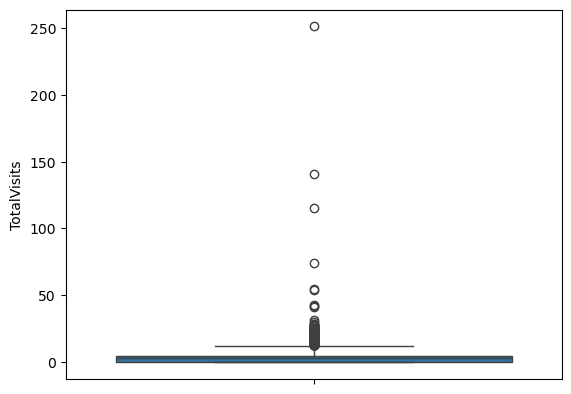

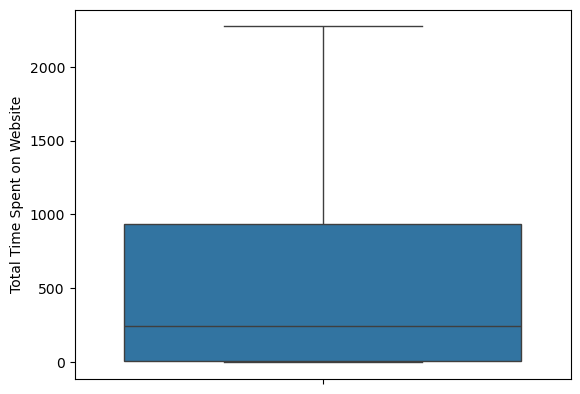

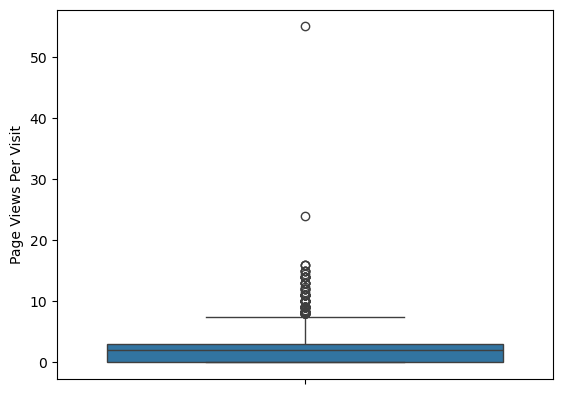

In [ ]:
#visualizing the numeric columns except binary columns
columns_to_visualize = [
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Iterate through each column and create a boxplot
for col in columns_to_visualize:
    sns.boxplot(Lead_data[col])
    plt.show()

In [ ]:
outlier_col=Lead_data[['TotalVisits','Page Views Per Visit']]

In [ ]:
outlier_col.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.394156,2.327787
std,4.836682,2.164258
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000
99%,17.000000,9.000000


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Lead_data['TotalVisits'].quantile(0.25)
Q3 = Lead_data['TotalVisits'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper bound
Lead_data['TotalVisits'] = np.where(Lead_data['TotalVisits'] > upper_bound, upper_bound, Lead_data['TotalVisits'])

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = Lead_data['Page Views Per Visit'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper bound
Lead_data['Page Views Per Visit'] = np.where(Lead_data['Page Views Per Visit'] > upper_bound, upper_bound, Lead_data['Page Views Per Visit'])

#### 3.5 Standardizing the values

In [ ]:
# The select value means the user didnt choose anytihng in the dropdown while browsing
select_columns=['Specialization','How did you hear about X Education','City','Last Notable Activity']
for col in select_columns:
    Lead_data[col]=Lead_data[col].replace('Select','Unknown')

#### 3.6 Visualize data
##### Univariate Analysis

##### Categorical unordered univariate analysis

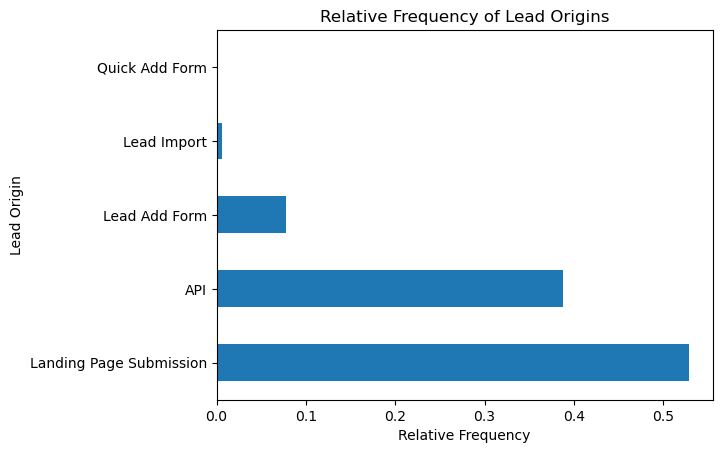

In [ ]:
Lead_data['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Lead Origin')
plt.title('Relative Frequency of Lead Origins')
plt.show()

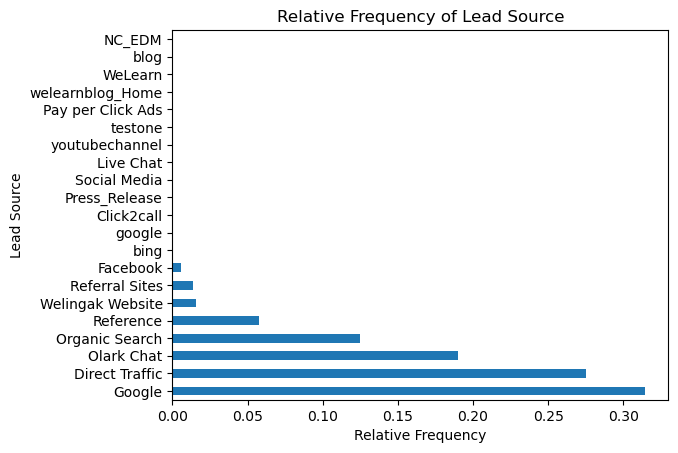

In [ ]:
Lead_data['Lead Source'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Lead Source')
plt.title('Relative Frequency of Lead Source')
plt.show()

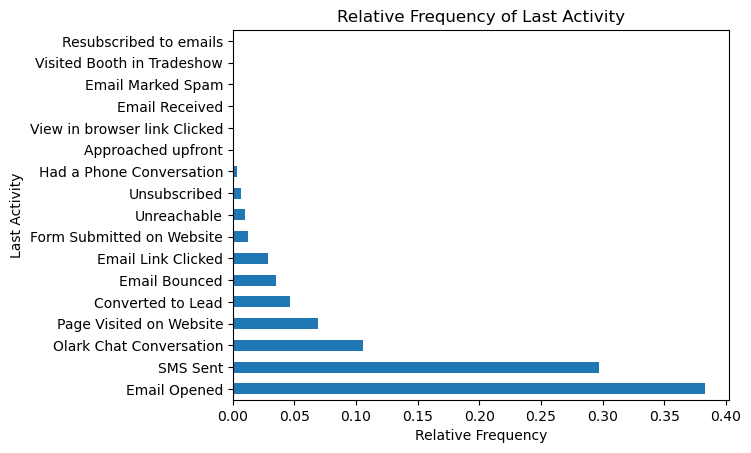

In [ ]:
Lead_data['Last Activity'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Last Activity')
plt.title('Relative Frequency of Last Activity')
plt.show()

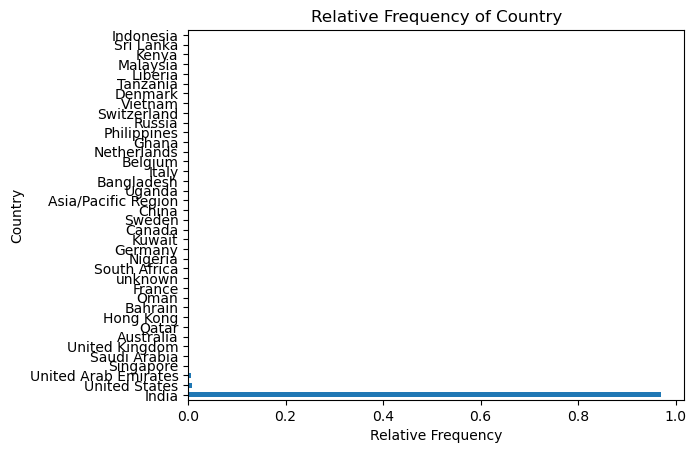

In [ ]:
Lead_data['Country'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Country')
plt.title('Relative Frequency of Country')
plt.show()

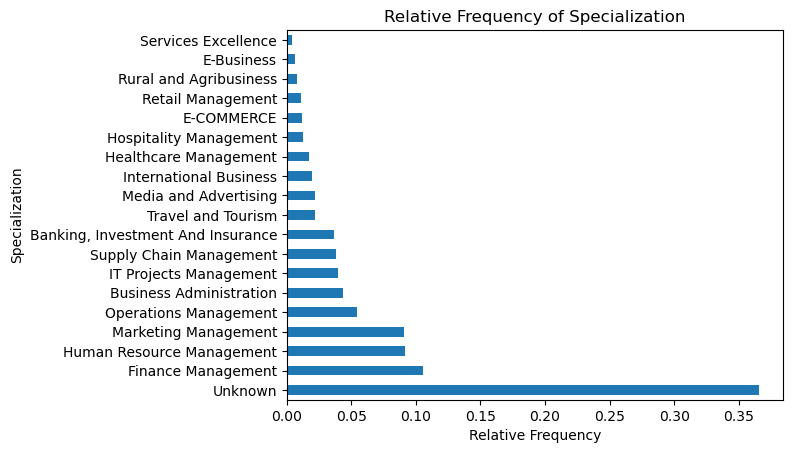

In [ ]:
Lead_data['Specialization'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Specialization')
plt.title('Relative Frequency of Specialization')
plt.show()

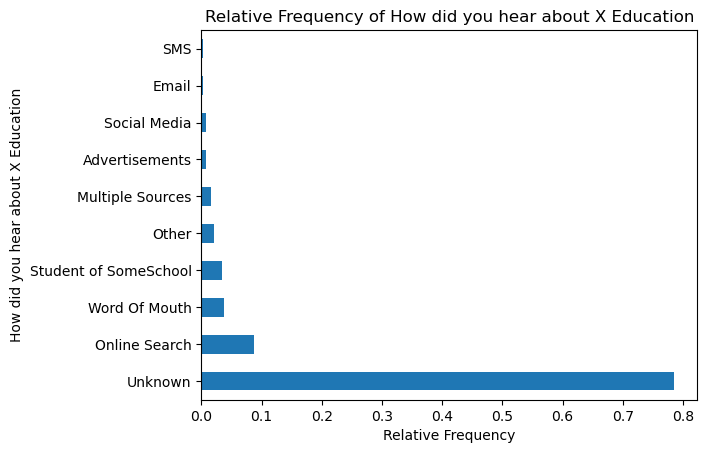

In [ ]:
Lead_data['How did you hear about X Education'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('How did you hear about X Education')
plt.title('Relative Frequency of How did you hear about X Education')
plt.show()

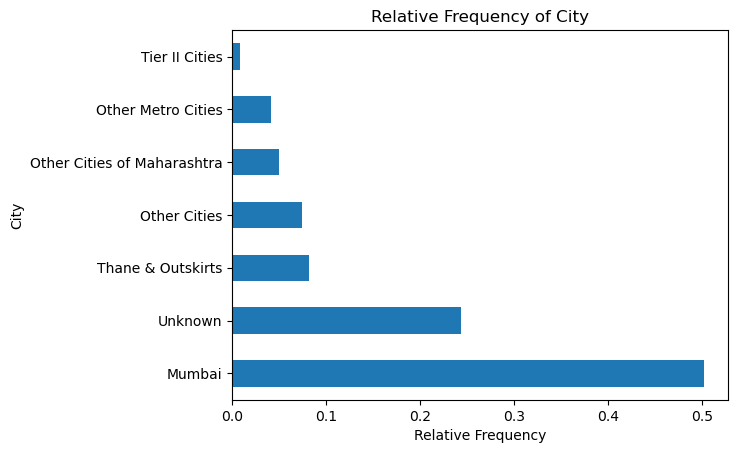

In [ ]:
Lead_data['City'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('City')
plt.title('Relative Frequency of City')
plt.show()

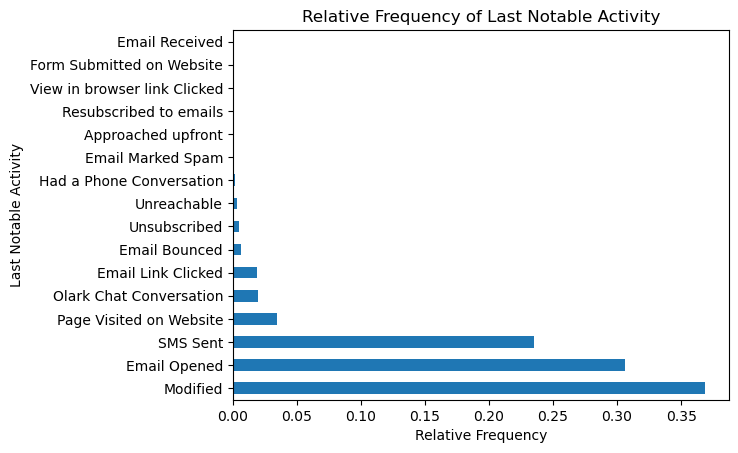

In [ ]:
Lead_data['Last Notable Activity'].value_counts(normalize=True).plot.barh()
plt.xlabel('Relative Frequency')
plt.ylabel('Last Notable Activity')
plt.title('Relative Frequency of Last Notable Activity')
plt.show()

##### Categorical ordered univariate analysis

In [ ]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Search,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unknown,0,0,0,Unknown,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unknown,0,0,0,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Unknown,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,0,0,0,Mumbai,0,Modified


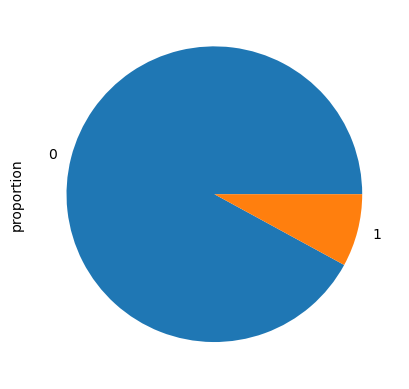

In [ ]:
Lead_data['Do Not Email'].value_counts(normalize= True).plot.pie()
plt.show()

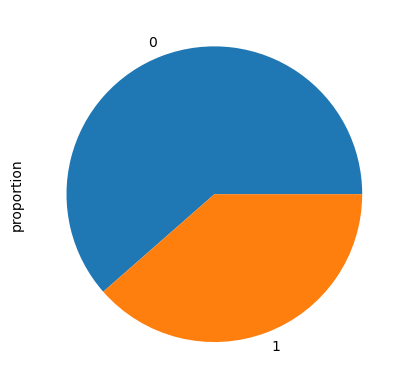

In [ ]:
Lead_data['Converted'].value_counts(normalize= True).plot.pie()
plt.show()

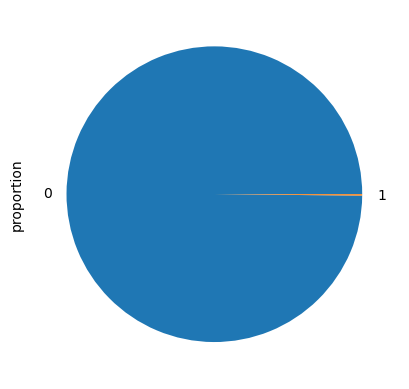

In [ ]:
Lead_data['Search'].value_counts(normalize= True).plot.pie()
plt.show()

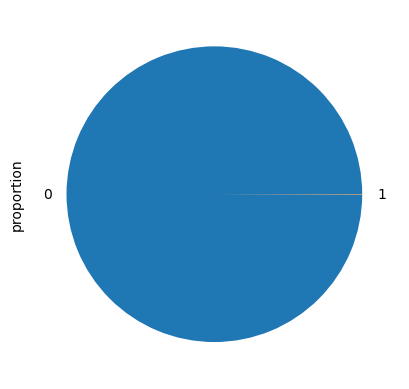

In [ ]:
Lead_data['Digital Advertisement'].value_counts(normalize= True).plot.pie()
plt.show()

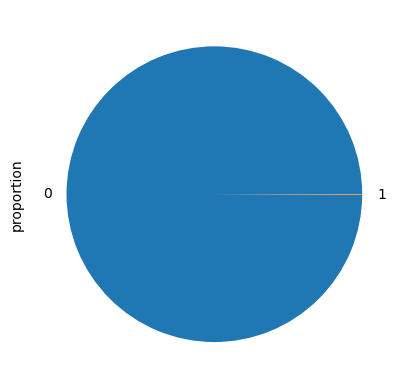

In [ ]:
Lead_data['Through Recommendations'].value_counts(normalize= True).plot.pie()
plt.show()

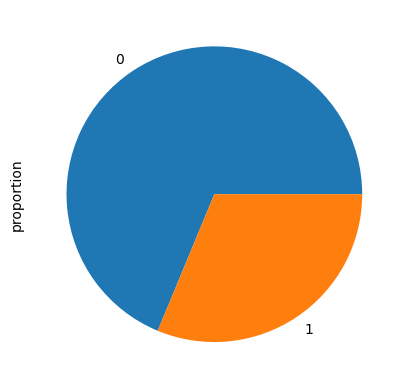

In [ ]:
Lead_data['A free copy of Mastering The Interview'].value_counts(normalize= True).plot.pie()
plt.show()

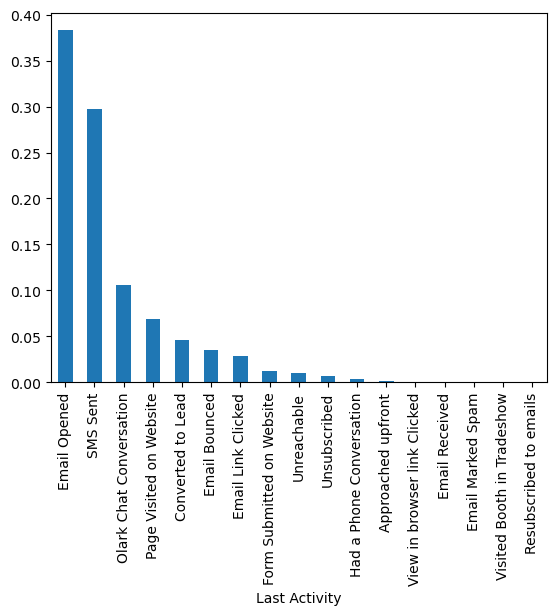

In [ ]:
#calculate the percentage of each poutcome category.
Lead_data['Last Activity'].value_counts(normalize= True).plot.bar()
plt.show()

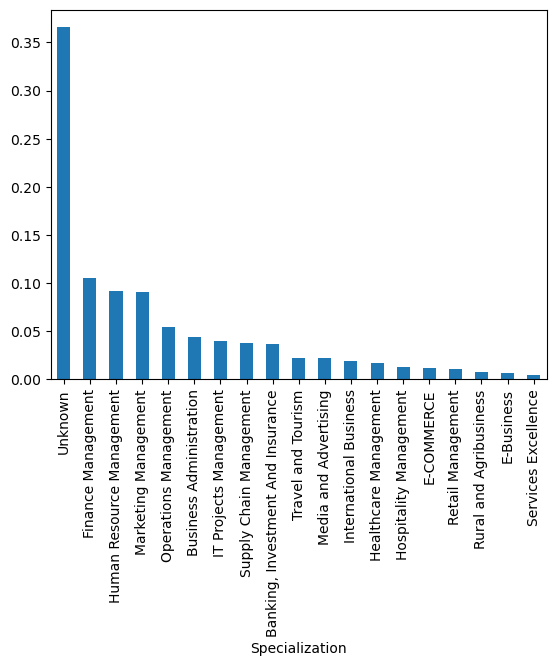

In [ ]:
#calculate the percentage of each poutcome category.
Lead_data['Specialization'].value_counts(normalize= True).plot.bar()
plt.show()

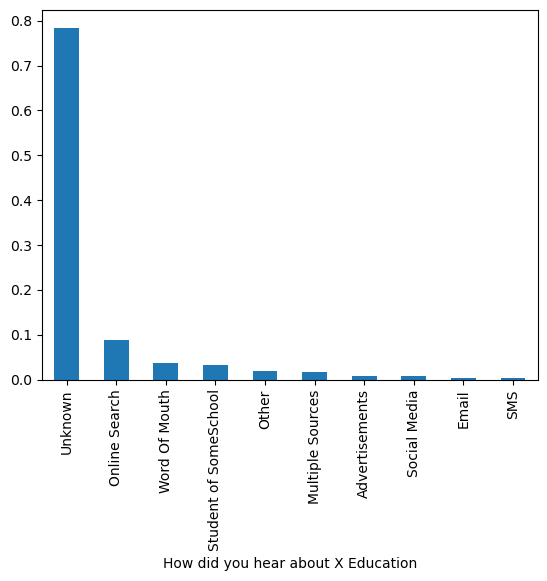

In [ ]:
#calculate the percentage of each poutcome category.
Lead_data['How did you hear about X Education'].value_counts(normalize= True).plot.bar()
plt.show()

In [ ]:
#### Converted the target variable

In [ ]:
#calculate the percentage of each response category.
Lead_data['Converted'].value_counts(normalize= True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

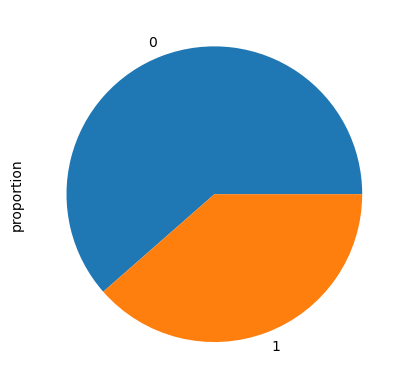

In [ ]:
#plot the pie chart of response categories
Lead_data['Converted'].value_counts(normalize= True).plot.pie()
plt.show()

##### Bivariate and Multivariate Analysis

##### Numeric- numeric analysis

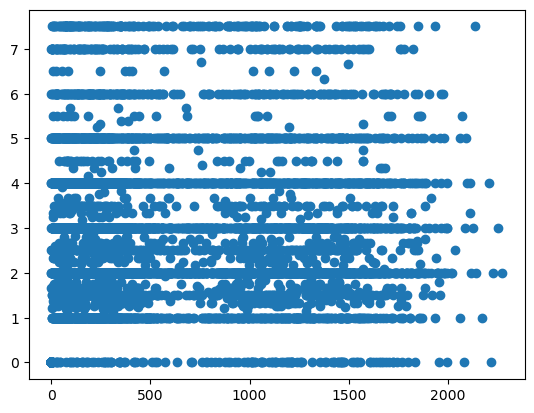

In [ ]:
plt.scatter(Lead_data['Total Time Spent on Website'],Lead_data['Page Views Per Visit'])

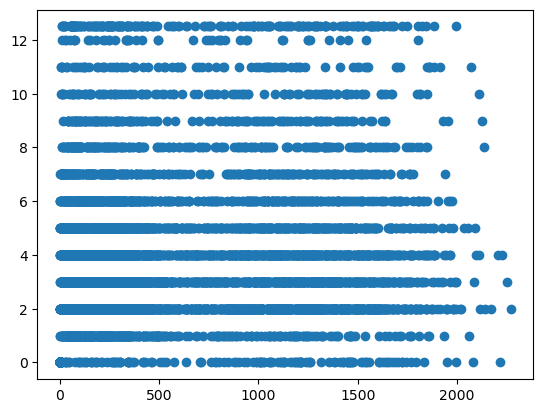

In [ ]:
plt.scatter(Lead_data['Total Time Spent on Website'],Lead_data['TotalVisits'])

Text(0.5, 1.0, 'Scatter Plot: Total Visits vs. Page Views Per Visit')

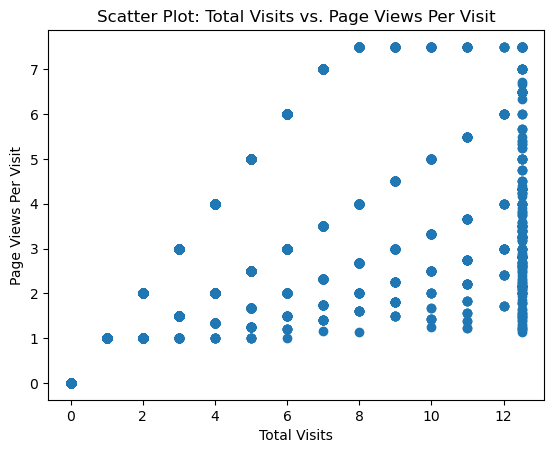

In [ ]:
plt.scatter(Lead_data['TotalVisits'],Lead_data['Page Views Per Visit'])
plt.xlabel('Total Visits')
plt.ylabel('Page Views Per Visit')
plt.title('Scatter Plot: Total Visits vs. Page Views Per Visit')


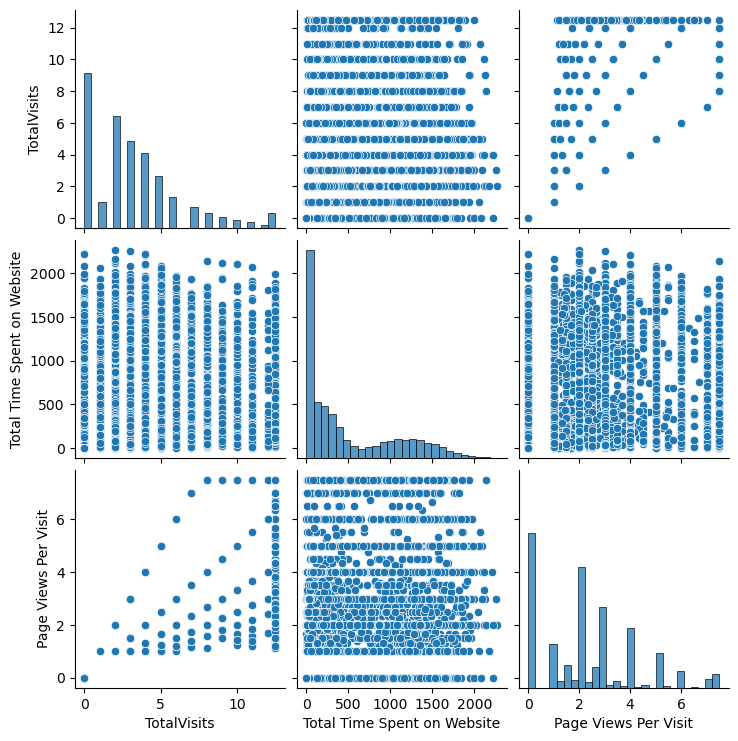

In [ ]:
sns.pairplot(data=Lead_data, vars=["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"])
plt.show()

##### Categorical categorical variable

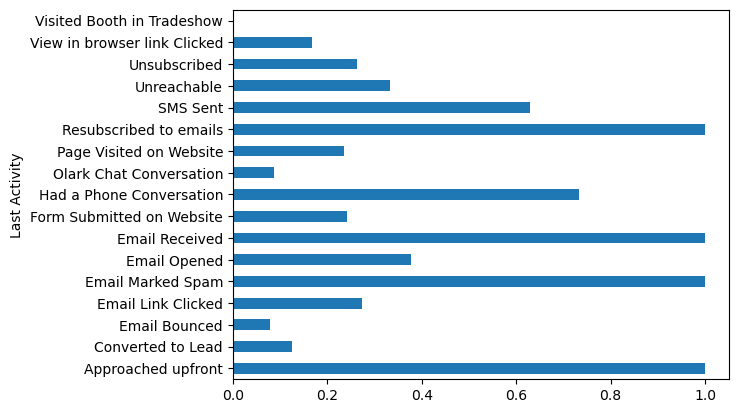

In [ ]:
Lead_data.groupby(["Last Activity"])["Converted"].mean().plot.barh()
plt.show()

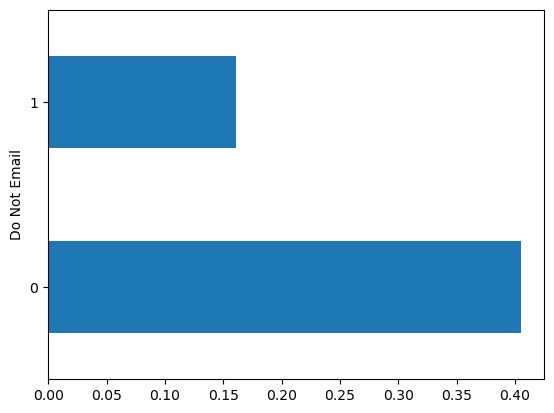

In [ ]:
Lead_data.groupby(["Do Not Email"])["Converted"].mean().plot.barh()
plt.show()

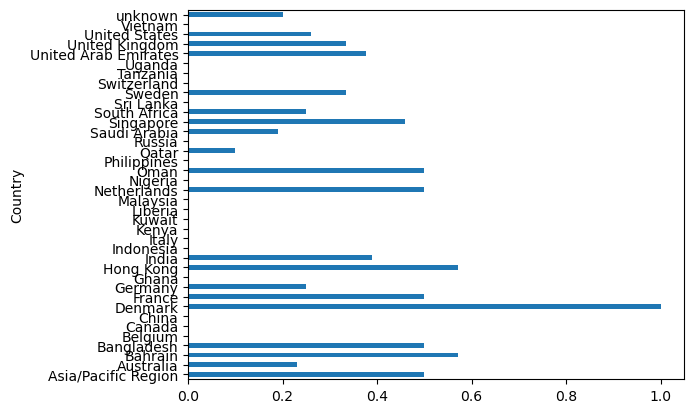

In [ ]:
Lead_data.groupby(["Country"])["Converted"].mean().plot.barh()
plt.show()

#### 3.7 Creating dummy Variables

In [ ]:
# Creating dummy variables for the 'Lead Origin' column and adding a unique prefix
col1 = pd.get_dummies(Lead_data['Lead Origin'], prefix='Lead_Origin').astype(int)

# Dropping the original 'Lead Origin' column from the dataframe
Lead_data = Lead_data.drop(['Lead Origin'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col1], axis=1)

# Creating dummy variables for the 'Lead Source' column and adding a unique prefix
col2 = pd.get_dummies(Lead_data['Lead Source'], prefix='Lead_Source').astype(int)

# Dropping the original 'Lead Source' column from the dataframe
Lead_data = Lead_data.drop(['Lead Source'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col2], axis=1)

# Creating dummy variables for the 'Last Activity' column and adding a unique prefix
col3 = pd.get_dummies(Lead_data['Last Activity'], prefix='Last_Activity').astype(int)

# Dropping the original 'Last Activity' column from the dataframe
Lead_data = Lead_data.drop(['Last Activity'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col3], axis=1)

# Creating dummy variables for the 'Country' column and adding a unique prefix
col4 = pd.get_dummies(Lead_data['Country'], prefix='Country').astype(int)

# Dropping the original 'Country' column from the dataframe
Lead_data = Lead_data.drop(['Country'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col4], axis=1)

# Creating dummy variables for the 'Specialization' column and adding a unique prefix
col5 = pd.get_dummies(Lead_data['Specialization'], prefix='Specialization').astype(int)

# Dropping the original 'Specialization' column from the dataframe
Lead_data = Lead_data.drop(['Specialization'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col5], axis=1)

# Creating dummy variables for the 'How did you hear about X Education' column and adding a unique prefix
col6 = pd.get_dummies(Lead_data['How did you hear about X Education'], prefix='How_heard_X_Education').astype(int)

# Dropping the original 'How did you hear about X Education' column from the dataframe
Lead_data = Lead_data.drop(['How did you hear about X Education'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col6], axis=1)

# Creating dummy variables for the 'City' column and adding a unique prefix
col7 = pd.get_dummies(Lead_data['City'], prefix='City').astype(int)

# Dropping the original 'City' column from the dataframe
Lead_data = Lead_data.drop(['City'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col7], axis=1)

# Creating dummy variables for the 'Last Notable Activity' column and adding a unique prefix
col8 = pd.get_dummies(Lead_data['Last Notable Activity'], prefix='Last_Notable_Activity').astype(int)

# Dropping the original 'Last Notable Activity' column from the dataframe
Lead_data = Lead_data.drop(['Last Notable Activity'], axis=1)

# Concatenating the new dummy variables with the original dataframe
Lead_data = pd.concat([Lead_data, col8], axis=1)


In [ ]:
#Deleting one col which could also be achieved with drop_first=True
Lead_data = Lead_data.drop([
    'Lead_Origin_API',
    'Lead_Source_Click2call',
    'Country_Asia/Pacific Region',
    'Specialization_Banking, Investment And Insurance',
    'How_heard_X_Education_Advertisements',
    'City_Mumbai',
    'Last_Notable_Activity_Approached upfront'
], axis=1)

In [ ]:
#checking if any object Dataype columns are left
Lead_data.select_dtypes("object")

""
0
1
2
3
4
...
9235
9236
9237
9238


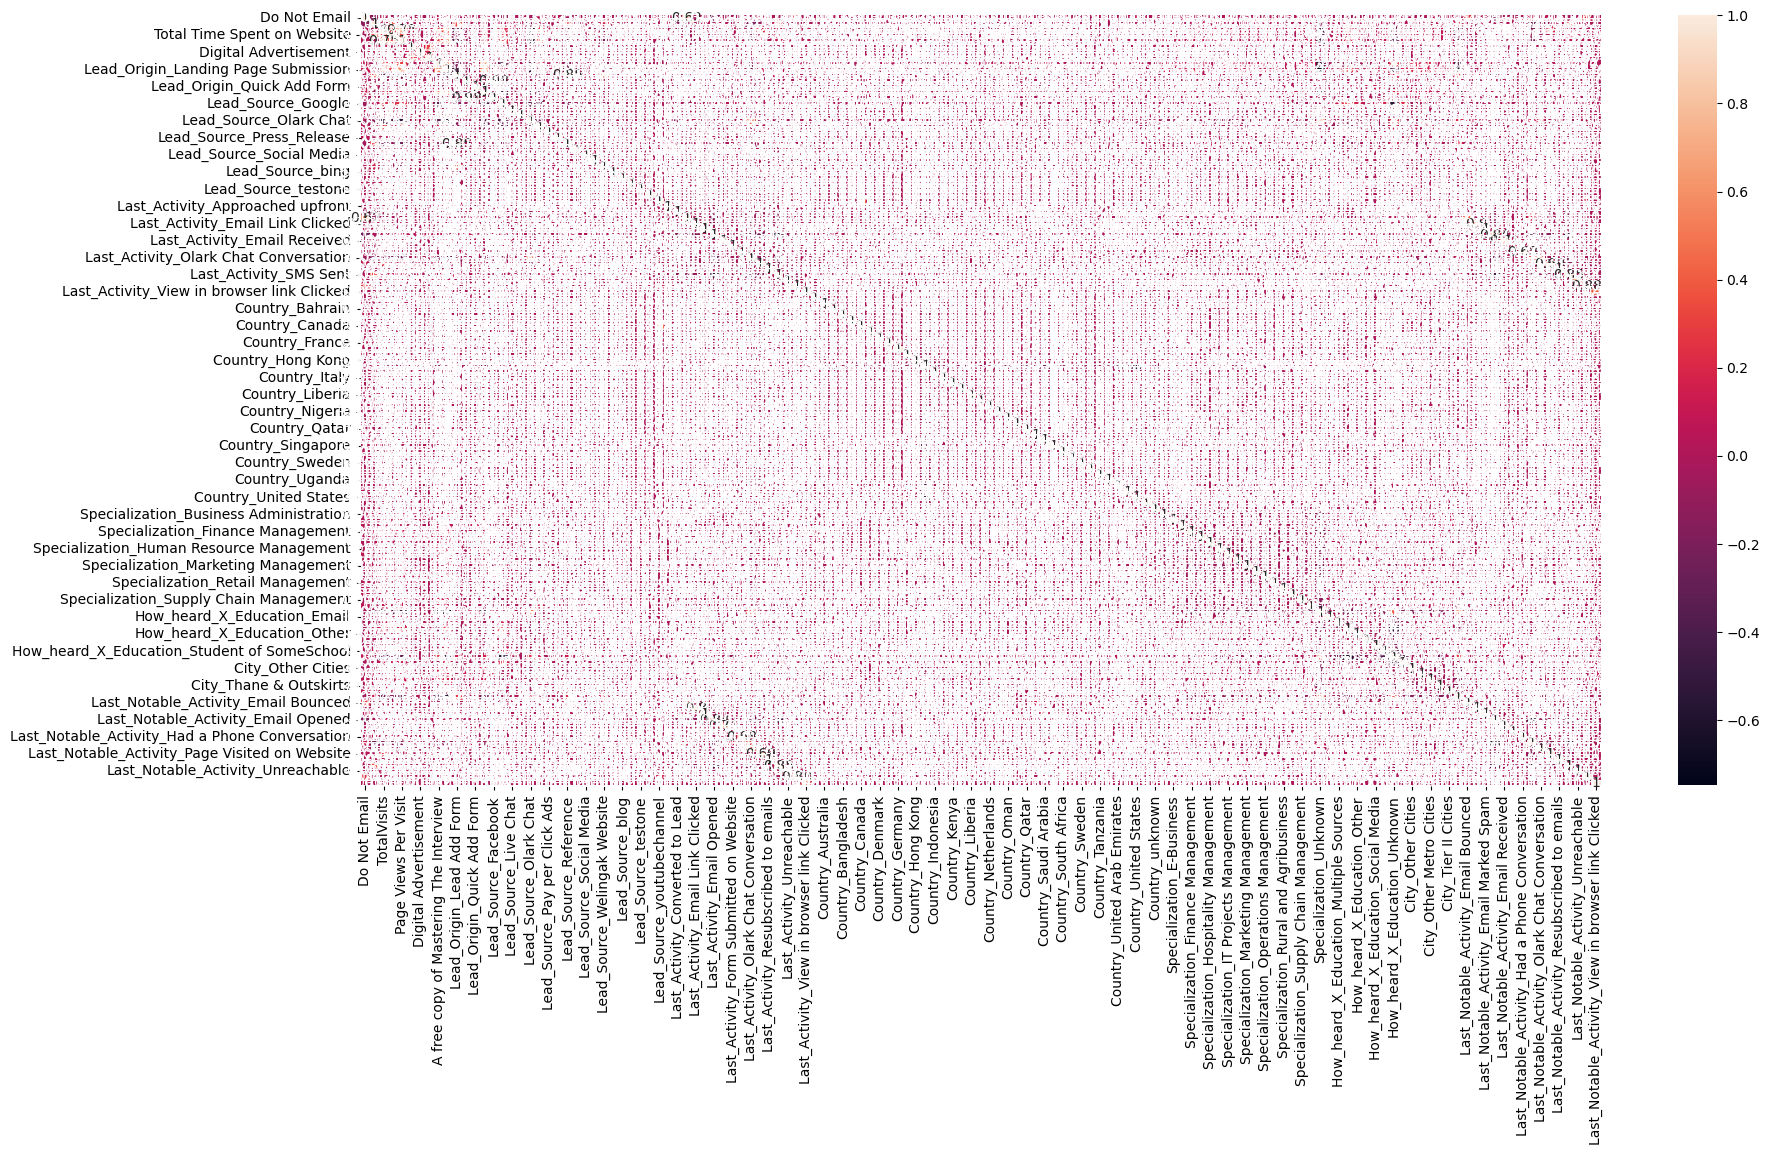

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

In [ ]:
#Highly unlikely for us to read anything from here

#### 3.8  Scale numeric data.

In [ ]:
#Splitting into target and predictor dataframes
X=Lead_data.drop(['Converted'],axis=1)

In [ ]:
y=Lead_data['Converted']

In [ ]:
#splitting into train and test dataset by 70:30 ratio,The random_state parameter ensures reproducibility of the data split,
#meaning that the same split of the data will occur every time the code is run, given the same random_state value.This is crucial
# for consistency in model development, debugging, and comparing results across different runs or with other team members.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
Lead_data.head(10)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,1,2.0,1640,2.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,2.0,71,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,4.0,58,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Reshape the column into a 2D array (single column)
# The .values part converts the pandas Series (which is just a column of data) into a NumPy array.
# .reshape(-1, 1) reshapes the data into a 2D array.
# -1 means "automatically calculate the number of rows based on the data size" (so it adjusts to fit the data).
# 1 means there is 1 column (since you're working with a single feature).

X_train['Total Time Spent on Website'] = scaler.fit_transform(X_train['Total Time Spent on Website'].values.reshape(-1, 1))


In [ ]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
1871,0,0.0,-0.885371,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,4.0,0.005716,1.33,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,5.0,-0.691418,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,5.0,1.365219,5.00,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0.0,-0.885371,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4 : Model Building

In [ ]:
#sm.GLM() is used to create a Generalized Linear Model (GLM) in Statsmodels, a statistical modeling library in Python.
#GLM is a flexible framework for regression that allows you to specify different types of distributions for the dependent variable
#(like normal, binomial, Poisson, etc.).

#sm.add_constant(X_train) adds a constant term (intercept) to your feature matrix X_train.
#Without an intercept, the model would be forced to pass through the origin, which is often not realistic for many datasets.

#sm.families.Binomial()This specifies the family of the GLM. In this case, Binomial() is used for binary outcome data
#(i.e., a target variable that takes on two possible values, often 0 and 1).

#.fit() fits the GLM model to the training data (X_train and y_train).
#.summary() provides a detailed report of the fitted model.

import statsmodels.api as sm

logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                          123
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Dec 2024   Deviance:                   1.7417e+05
Time:                        22:43:25   Pearson chi2:                 8.52e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -2.399e+14   5.72e+07  -4.19e+06      0.000    -2.4e+14    -2.4e+14
Do Not Email                                       -5.578e+14   4.47e+06  -1.25e+08      0.000   -5.58e+14   -5.58e+14
TotalVisits                                         6.383e+13    4.6e+05   1.39e+08      0.000    6.38e+13    6.38e+13
Total Time Spent on Website                         7.551e+14   9.54e+05   7.91e+08      0.000    7.55e+14    7.55e+14
Page Views Per Visit                               -1.074e+14   7.81e+05  -1.38e+08      0.000   -1.07e+14   -1.07e+14
Search                                             -6.766e+14   2.18e+07   -3.1e+07      0.000   -6.77e+14   -6.77e+14
Digital Advertisement                              -4.548e+15   4.02e+07  -1.13e+08      0.000   -4.55e+15   -4.55e+15
Through Recommendations                             7.169e+13   2.76e+07    2.6e+06      0.000    7.17e+13    7.17e+13
A free copy of Mastering The Interview             -2.742e+14   3.32e+06  -8.25e+07      0.000   -2.74e+14   -2.74e+14
Lead_Origin_Landing Page Submission                -1.836e+14   3.99e+06   -4.6e+07      0.000   -1.84e+14   -1.84e+14
Lead_Origin_Lead Add Form                           1.104e+15   1.31e+07   8.46e+07      0.000     1.1e+15     1.1e+15
Lead_Origin_Lead Import                            -1.132e+15   4.87e+07  -2.32e+07      0.000   -1.13e+15   -1.13e+15
Lead_Origin_Quick Add Form                          3.509e+15   6.88e+07    5.1e+07      0.000    3.51e+15    3.51e+15
Lead_Source_Direct Traffic                          9.075e+14   4.11e+07   2.21e+07      0.000    9.07e+14    9.07e+14
Lead_Source_Facebook                                2.638e+15   6.37e+07   4.14e+07      0.000    2.64e+15    2.64e+15
Lead_Source_Google                                  1.146e+15    4.1e+07    2.8e+07      0.000    1.15e+15    1.15e+15
Lead_Source_Live Chat                               6.665e+15   6.15e+07   1.08e+08      0.000    6.67e+15    6.67e+15
Lead_Source_NC_EDM                                   3.52e+15   7.93e+07   4.44e+07      0.000    3.52e+15    3.52e+15
Lead_Source_Olark Chat                               1.61e+15   4.11e+07   3.92e+07      0.000    1.61e+15    1.61e+15
Lead_Source_Organic Search                          1.074e+15   4.11e+07   2.61e+07      0.000    1.07e+15    1.07e+15
Lead_Source_Pay per Click Ads                      -4.026e+15   7.88e+07  -5.11e+07      0.000   -4.03e+15   -4.03e+15
Lead_Source_Press_Release                          -2.118e+15   6.32e+07  -3.35e+07      0.000   -2.12e+15   -2.12e+15
Lead_Source_Reference                               1.318e+15    3.9e+07   3.38e+07      0.000    1.32e+15  

In [ ]:
#logreg = LogisticRegression() creates an instance of the logistic regression model and stores it in the variable logreg.
#At this point, the model is initialized, but it has not yet been trained on any data.
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
#RFE is a feature selection technique that selects important features by recursively removing the least important ones.
#Feature selection helps improve model performance by reducing overfitting,
#improving training time, and simplifying the model, especially when you have a large number of features.

#The estimator parameter is the model that will be used to evaluate the importance of features.
#In this case, logreg refers to the logistic regression model (created earlier with LogisticRegression()).

#This parameter specifies the number of features you want to select after performing RFE.

#Process of rfe.fit():
#Step 1: Initially, all the features in X_train are considered.
#Step 2: The model (logreg, in this case) is trained with all features, and the importance of each feature is calculated.
#Step 3: The least important feature is eliminated, and the model is retrained with the remaining features.
#Step 4: This process continues recursively, removing one feature at a time, until only the top 15 most important features are retained.



# Initialize RFE with the logistic regression model and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to the training data
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Get the support (True for selected features)
selected_features = rfe.support_

# Get the features' rankings
ranking = rfe.ranking_

# Print out the selected features
print("Selected Features:", X_train.columns[selected_features])

Selected Features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Welingak Website', 'Last_Activity_Approached upfront',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Country_Qatar',
       'Specialization_Unknown', 'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website'],
      dtype='object')


In [ ]:
col= X_train.columns[selected_features]

In [ ]:
#Re-Building a model with col selected with RFE
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.0
Date:                Sat, 14 Dec 2024   Deviance:                       5650.1
Time:                        22:43:31   Pearson chi2:                 6.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.9389      0.123     15.709      0.000       1.697       2.181
Do Not Email                                     -1.5928      0.163     -9.748      0.000      -1.913      -1.273
Total Time Spent on Website                       0.9753      0.036     27.472      0.000       0.906       1.045
Lead_Origin_Landing Page Submission              -1.6076      0.116    -13.902      0.000      -1.834      -1.381
Lead_Origin_Lead Add Form                         2.8217      0.193     14.649      0.000       2.444       3.199
Lead_Source_Welingak Website                      2.4519      0.749      3.272      0.001       0.983       3.921
Last_Activity_Approached upfront                 23.9307   2.67e+04      0.001      0.999   -5.23e+04    5.23e+04
Last_Activity_Had a Phone Conversation            1.4485      0.671      2.158      0.031       0.133       2.764
Last_Activity_Olark Chat Conversation            -0.7991      0.193     -4.131      0.000      -1.178      -0.420
Country_Qatar                                   -23.4176   2.43e+04     -0.001      0.999   -4.77e+04    4.76e+04
Specialization_Unknown                           -1.4370      0.118    -12.215      0.000      -1.668      -1.206
Last_Notable_Activity_Email Link Clicked         -1.7941      0.265     -6.768      0.000      -2.314      -1.274
Last_Notable_Activity_Email Opened               -1.3820      0.084    -16.376      0.000      -1.547      -1.217
Last_Notable_Activity_Modified                   -1.9475      0.093    -21.045      0.000      -2.129      -1.766
Last_Notable_Activity_Olark Chat Conversation    -1.5957      0.377     -4.237      0.000      -2.334      -0.858
Last_Notable_Activity_Page Visited on Website    -1.6439      0.183     -8.961      0.000      -2.003      -1.284
=================================================================================================================
"""

### Step 5 :Evaluating a model built

In [ ]:
#predicting values using train set of col selected after RFE
y_train_pred=res.predict(X_train_sm)
y_train_pred

1871    0.423945
6795    0.077121
3516    0.174449
8105    0.840610
3934    0.090371
          ...   
350     0.925193
79      0.961123
8039    0.148858
6936    0.113545
5640    0.090371
Length: 6468, dtype: float64

In [ ]:
#Creating a dataframe with actual target variable values and the predicted probability  for the target variable
y_train_pred_final= pd.DataFrame({'Converted':y_train.values,'Converted prob':y_train_pred})

In [ ]:
y_train_pred_final

,Converted,Converted prob
1871,0,0.423945
6795,0,0.077121
3516,0,0.174449
8105,0,0.840610
3934,0,0.090371
...,...,...
350,1,0.925193
79,1,0.961123
8039,1,0.148858
6936,0,0.113545


In [ ]:
#converting to 1 or 0 based on probablity >0.5
y_train_pred_final['predicted']= y_train_pred_final['Converted prob'].map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_train_pred_final

,Converted,Converted prob,predicted
1871,0,0.423945,0
6795,0,0.077121,0
3516,0,0.174449,0
8105,0,0.840610,1
3934,0,0.090371,0
...,...,...,...
350,1,0.925193,1
79,1,0.961123,1
8039,1,0.148858,0
6936,0,0.113545,0


In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

In [ ]:
#Viewing the confusion matrix
print(confusion)

[[3504  498]
 [ 861 1605]]


In [ ]:
accuracy=metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

In [ ]:
#Viewing the accuracy
print(accuracy)

0.7898886827458256


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6508515815085159

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8755622188905547

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12443778110944528


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.7631954350927247


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8027491408934708


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score( y_train_pred_final['Converted'],y_train_pred_final['predicted'])

0.7631954350927247

In [ ]:
recall_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

0.6508515815085159

##### Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to collinearity with other features. VIF.A VIF value close to 1 means no multicollinearity between this feature and the others.
A VIF value greater than 5 or 10 suggests that the feature is highly collinear with other features in the dataset and may need to be addressed (possibly removed or combined with other features)

At this point it is important to re-avaluate the accuracy based on collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last_Notable_Activity_Modified,2.39
2,Lead_Origin_Landing Page Submission,2.27
9,Specialization_Unknown,2.08
11,Last_Notable_Activity_Email Opened,1.84
7,Last_Activity_Olark Chat Conversation,1.81
13,Last_Notable_Activity_Olark Chat Conversation,1.34
3,Lead_Origin_Lead Add Form,1.32
4,Lead_Source_Welingak Website,1.25
0,Do Not Email,1.16
1,Total Time Spent on Website,1.13


In [ ]:
# Since all the features have VIF vlaues to be less than 3 , we need not make any change

A Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of a binary classification model. It is widely used in machine learning and statistics for assessing the trade-offs between different types of errors made by the model. A model that performs better than random guessing will produce a curve that lies above the diagonal line. The further the ROC curve is from the diagonal, the better the model is at distinguishing between the classes.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'],
                                         y_train_pred_final['Converted prob'], drop_intermediate = False )

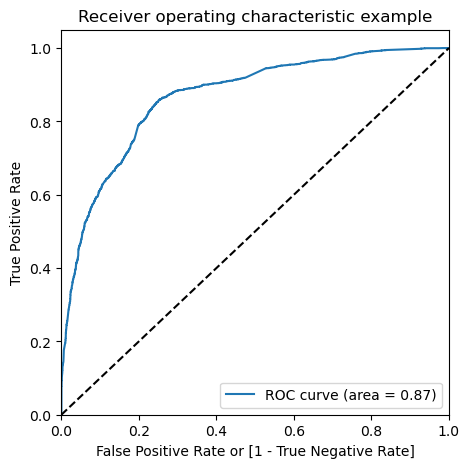

In [ ]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Converted prob'])

From the above image, the model can be interpretted to be good as it is above the diagonal line

In [ ]:
X_test['Total Time Spent on Website'] = scaler.transform(X_test['Total Time Spent on Website'].values.reshape(-1, 1))
#If you call fit on the test data, the model would use information from the test set (mean, standard deviation, or min/max) to scale the data,
#which would leak information about the test set into the training process. This would invalidate the model evaluation,
#as the test data should remain unseen and independent from the training process.

In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Welingak Website,Last_Activity_Approached upfront,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Country_Qatar,Specialization_Unknown,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,0,0,0
9199,0,-0.885371,0,0,0,0,0,1,0,1,0,0,1,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.808857,1
1,1,0.921295,1
2,1,0.765066,1
3,0,0.042771,0
4,1,0.925193,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.7965367965367965

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion2
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7433789954337899

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8312462731067383